In [3]:
import os
import sys
import numpy as np
import pandas as pd
sys.path.insert(0, os.path.abspath('..'))

from autocnet.matcher.outlier_detector import SpatialSuppression

from IPython.display import display

%pylab inline

Populating the interactive namespace from numpy and matplotlib


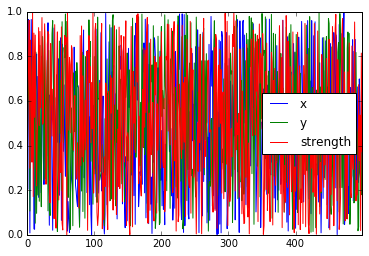

In [9]:
r = np.random.RandomState(12345)
df = pd.DataFrame(r.uniform(0,1,(500, 3)), columns=['x', 'y', 'strength'])
SpatialSuppression(df, (0,1))
df.plot()